In [ ]:
!pip install PyMuPDF
!pip install transformers
!pip install torch
!pip install pytesseract opencv-python pytorch transformers wordcloud streamlit PyMuPDF
!pip install torch torchvision torchaudio
!pip install pytesseract
!pip install streamlit


  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pytorch)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 51.8 MB/s eta 0:00:00


Saving 22CS140 - Rithiga.V.pdf to 22CS140 - Rithiga.V.pdf


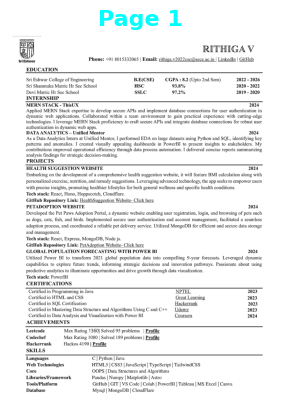

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


Text from Page 1:
Geientipé teatime

lett RITHIGA V

Sale Phone: +91 8015332065 | Email: rithiga.v2022cse@sece.ac.in | LinkedIn | GitHub
EDUCATION
Sri Eshwar College of Engineering B.E(CSE) CGPA : 8.2 (Upto 2nd Sem) 2022 - 2026
Sri Shanmuka Matric Hr Sec School HSC 93.8% 2020 - 2022
Devi Matric Hr Sec School SSLC 97.2% 2019 - 2020
INTERNSHIP

MERN STACK - ThisUX 2024
Applied MERN Stack expertise to develop secure APIs and implement database connections for user authentication in
dynamic web applications. Collaborated within a team environment to gain practical experience with cutting-edge
technologies. I leverage MERN Stack proficiency to craft secure APIs and integrate database connections for robust user
authentication in dynamic web apps.

DATA ANALYTICS — Unified Mentor 2024
As a Data Analytics Intern at Unified Mentor, I performed EDA on large datasets using Python and SQL, identifying key
patterns and anomalies. I created visually appealing dashboards in PowerBI to present insigh

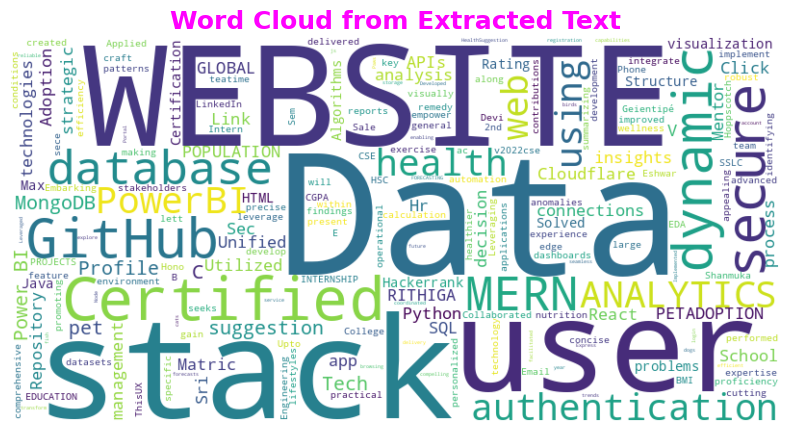

Extracted text saved as JSON.


In [ ]:
!pip install PyMuPDF
import fitz  # PyMuPDF
import cv2 as cv
import pytesseract
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt
from transformers import pipeline
from wordcloud import WordCloud
import json
pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"

# Upload the PDF
uploaded = files.upload()
pdf_path = list(uploaded.keys())[0]

# Open the PDF and extract images
doc = fitz.open(pdf_path)

extracted_text = ""

# Process each page of the PDF
for page_num in range(len(doc)):
    page = doc.load_page(page_num)
    pix = page.get_pixmap(dpi=300)
    image_path = f"page_{page_num + 1}.png"
    pix.save(image_path)

    # Read the image using OpenCV
    img = cv.imread(image_path)

    # Preprocessing: Grayscale conversion
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Adaptive thresholding for better text isolation
    thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv.THRESH_BINARY, 11, 2)

    # Remove noise
    kernel = np.ones((1, 1), np.uint8)
    processed_img = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)

    # Optional: Display the processed image with styled title
    plt.imshow(processed_img, cmap='gray')
    plt.axis('off')
    plt.title(f"Page {page_num + 1}", fontsize=16, color='cyan', fontweight='bold')
    plt.show()
    # Extract text using Tesseract
    text = pytesseract.image_to_string(processed_img, lang='eng')  # Specify language if needed
    print(f"\033[1;32mText from Page {page_num + 1}:\033[0m\n{text}\n{'='*50}")

    # Append text
    extracted_text += text + "\n"

# Save the extracted text to a file
output_file = "extracted_text.txt"
with open(output_file, "w") as f:
    f.write(extracted_text)

print(f"\033[1;34mText successfully extracted and saved to {output_file}\033[0m")

# Load a pre-trained summarization pipeline
summarizer = pipeline("summarization")

# Summarize the extracted text
summary = summarizer(extracted_text, max_length=130, min_length=30, do_sample=False)
print("\033[1;33mSummary of Extracted Text:\033[0m\n", summary[0]['summary_text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(extracted_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud from Extracted Text", fontsize=18, color='magenta', fontweight='bold')
plt.show()

# Save as JSON
json_output = {"text": extracted_text}
with open("extracted_text.json", "w") as json_file:
    json.dump(json_output, json_file)

print("\033[1;34mExtracted text saved as JSON.\033[0m")
